<center><a href="https://wangyu16.github.io/PolymerScienceEducation/"><img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/Fig/Logo_black.svg" width='150' /></a></center>

# Step Growth Polymerization

-----------

To learn the background knowledge, please visit this [study guide](https://hackmd.io/@YW2025/SJF_Nim2A).

##  What does this simulator do and how to use it?

The simulation provides statistical results of step growth polymerization of either AB type monomers or AA and BB type monomers. The simulation can also take into account the contributon of mono-functional molecules. Users simply select the initial conditions and run all the cells, the results will be listed below.

In [1]:
#@title 1. Install and import packages {display-mode: "form" }
%%capture
import sys
if not 'sigfig' in sys.modules:
    !pip install sigfig
from sigfig import round
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from collections import Counter

In [2]:
#@title 2. Simulation Conditions { display-mode: "form" }

#@markdown Assume the initial number of all molecules is $N_0$.

#@markdown The initial numbers of AB, AA, and BB type monomers are $N^\text{AB}_0$, $N^\text{AA}_0$, and $N^\text{BB}_0$, respectively.

#@markdown The initial numbers of mono-functional molecules (chain stoppers) RA and RB are $N^\text{RA}_0$ and $N^\text{RB}_0$.

#@markdown Select the type of polymerization to simulate.

Type_of_polymerization = "Polymerization of AA and BB type monomers" #@param ["Polymerization of AB type monomers", "Polymerization of AA and BB type monomers"]
Targeted_extend_of_reaction = 0.9999 #@param {type:"slider", min:0.9, max:1, step:0.0001}
#@markdown Set the total number of molecules as $N_0 = 10^n$.

n = 6 #@param{type:"slider", min:4, max:7, step:0.1}

#@markdown If you choose to simulate the polymerization of AA and BB type monomers, set the ratio between two types of monomers.

r_AA_BB = 1.0018 #@param {type:"slider", min:0.9, max:1.1, step:0.0001}

#@markdown For the polymerization in the presence of chain stoppers, set the mole fraction of the chain stopers over the total number of molecules.

r_RA_N0 = 0.0003 #@param {type:"slider", min:0, max:0.05, step:0.0001}
r_RB_N0 = 0 #@param {type:"slider", min:0, max:0.05, step:0.0001}



N0 = int(10**n)
N_RB_0 = int(N0*r_RB_N0)
N_RA_0 = int(N0*r_RA_N0)
N_RR_0 = 0

if Type_of_polymerization == "Polymerization of AB type monomers":
  N_AB_0 = N0 - N_RB_0 - N_RA_0
  N_AA_BB_0 = 0
  N_AA_0 = 0
  N_BB_0 = 0
else:
  N_AB_0 = 0
  N_AA_BB_0 = N0 - N_RB_0 - N_RA_0
  N_AA_0 = int(N_AA_BB_0*r_AA_BB/(r_AA_BB + 1))
  N_BB_0 = N_AA_BB_0 - N_AA_0

In [3]:
#@title Initial Numbers of Different Type of Molecules { display-mode: "form" }

polymers = {
    'AB': [1]*N_AB_0,
    'AA': [1]*N_AA_0,
    'BB': [1]*N_BB_0,
    'RA': [1]*N_RB_0,
    'RB': [1]*N_RA_0,
    'RR': [1]*N_RR_0
}

print(f"The number of AB type monomers: {len(polymers['AB'])};\n \
The number of AA type monomers: {len(polymers['AA'])};\n \
The number of BB type monomers: {len(polymers['BB'])};\n \
The number of RA type chain stoppers: {len(polymers['RA'])};\n \
The number of RB type chain stoppers: {len(polymers['RB'])}.")

The number of AB type monomers: 0;
 The number of AA type monomers: 500299;
 The number of BB type monomers: 499401;
 The number of RA type chain stoppers: 0;
 The number of RB type chain stoppers: 300.


In [4]:
#@title 3. Simulation { display-mode: "form" }

#@markdown Note: The formation of cyclic molecules by intramolecular reaction of AB type molecules is neglected.
%%time
Extend_of_reaction = 0
while Extend_of_reaction < Targeted_extend_of_reaction:
  # Randomly choose one element from AB, AA and RA type molecules
  # Randomly choose one element from AB, BB and RB type moleclues
  # Make sure the above two steps do not choose the same AB type molecule
  M1 = random.choices(['AB','AA','RA'], weights=[len(polymers['AB']), 2*len(polymers['AA']), len(polymers['RA'])])[0]
  M2 = random.choices(['AB','BB','RB'], weights=[len(polymers['AB']), 2*len(polymers['BB']), len(polymers['RB'])])[0]

  M1_idx = random.randint(0,len(polymers[M1])-1)
  M2_idx = random.randint(0,len(polymers[M2])-1)

  if M1 == 'AB' and M2 == 'AB':
    while M1_idx == M2_idx:
      M2_idx = random.randint(0,len(polymers['AB'])-1)
    if M1_idx > M2_idx:
      temp = M2_idx
      M2_idx = M1_idx
      M1_idx = temp
    M3 = 'AB'
  elif M1 == 'AB' and M2 == 'BB':
    M3 = 'BB'
  elif M1 == 'AB' and M2 == 'RB':
    M3 = 'RB'
  elif M1 == 'AA' and M2 == 'AB':
    M3 = 'AA'
  elif M1 == 'AA' and M2 == 'BB':
    M3 = 'AB'
  elif M1 == 'AA' and M2 == 'RB':
    M3 = 'RA'
  elif M1 == 'RA' and M2 == 'AB':
    M3 = 'RA'
  elif M1 == 'RA' and M2 == 'BB':
    M3 = 'RB'
  else:
    M3 = 'RR'

  polymers[M3].append(polymers[M1][M1_idx]+polymers[M2][M2_idx])
  polymers[M2].pop(M2_idx)
  polymers[M1].pop(M1_idx)

  Extend_of_reaction_A = 1 - (len(polymers['AB'])+2*len(polymers['AA'])+len(polymers['RA']))/(N_AB_0 + 2*N_AA_0 + N_RA_0)
  Extend_of_reaction_B = 1 - (len(polymers['AB'])+2*len(polymers['BB'])+len(polymers['RB']))/(N_AB_0 + 2*N_BB_0 + N_RB_0)
  Extend_of_reaction = max([Extend_of_reaction_A, Extend_of_reaction_B])

print(f"The number of AB type molecules: {len(polymers['AB'])};\n \
The number of AA type molecules: {len(polymers['AA'])};\n \
The number of BB type molecules: {len(polymers['BB'])};\n \
The number of RA type molecules: {len(polymers['RA'])};\n \
The number of RB type molecules: {len(polymers['RB'])};\n \
The number of RR type molecules: {len(polymers['RR'])};\n \
The extend of reaction is {Extend_of_reaction}.")


The number of AB type molecules: 75;
 The number of AA type molecules: 642;
 The number of BB type molecules: 3;
 The number of RA type molecules: 236;
 The number of RB type molecules: 18;
 The number of RR type molecules: 23;
 The extend of reaction is 0.9999008812557444.
CPU times: user 1min 34s, sys: 698 ms, total: 1min 35s
Wall time: 1min 49s


The number average degree of polymerization is 1003.0. Weight average is 2057.0. 
 The molecular weight distribution can be expressed by DPw/DPn, which is 2.05.


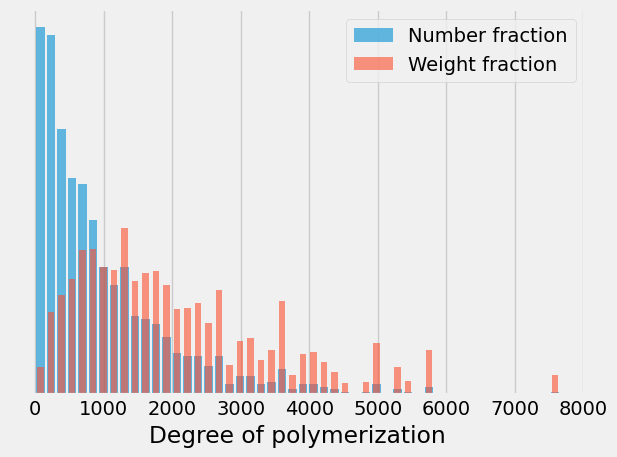

In [5]:
#@title 4. Results { display-mode: "form" }

polymers_combine = polymers['AB']+polymers['AA']+polymers['BB']+polymers['RA']+polymers['RB']+polymers['RR']
polymers_combine.sort()

counter = Counter(polymers_combine)
x = np.array(list(counter.keys()))
y = np.array(list(counter.values()))
z = x*y

polymers_weight = []
for i in range(0,len(x)):
  polymers_weight+=[x[i]]*z[i]

DPn = sum(polymers_combine)/len(polymers_combine)
DPw = sum(polymers_weight)/len(polymers_weight)

print(f"The number average degree of polymerization is {round(DPn, sigfigs=4)}. Weight average is {round(DPw, sigfigs=4)}. \n The molecular weight distribution can be expressed by DPw/DPn, which is {round(DPw/DPn, sigfigs=3)}.")

plt.xlabel("Degree of polymerization")
plt.hist(polymers_combine, bins=50, rwidth = 0.8, density=True, alpha=0.6, label="Number fraction")
plt.hist(polymers_weight, bins=50, rwidth=0.6, density=True, alpha=0.6, label="Weight fraction")
plt.legend()
ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()



---



In [1]:
#@title Copyright { display-mode: "form" }
import requests
from IPython.display import Markdown
copyright = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/copyright.md")
Markdown(copyright.text)

---

### MIT License  

Copyright (c) 2021 -- 2024 Yu Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Contact

Dr. Yu Wang  
Department of Chemistry  
Institute for Materials Research and Innovation  
University of Louisiana at Lafayette  
Lafayette, LA 70504  
Email: yuwang@louisiana.edu

### Acknowledgement

This project is sponsored by National Science Foundation (NSF-2142043). 


In [2]:
# @title {display-mode: "form" }
links = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/links.md")
Markdown(links.text)

---

### Links

**[Home page of OVESET](https://wangyu16.github.io/PolymerScienceEducation/):** 

<img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_OVESET.svg" alt="OVESET Home Page" width="300">

**[Home page of Study Guide](https://hackmd.io/@YW2025/HJLiqoHRR)**

<img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_PolymerStudyGuide.svg" alt="Introduction to Polymer Science" width="300">

